## _Tema6. Análisis de Regresión Lineal y RANSAC_

In [1]:
#Instalando las librerías necesarias

import os   #Cambiar directorio de trabajo

#Manipulación de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado y modelado
from scipy import stats    #Contiene a la función de pearsonr
from scipy import special  #Contiene la función softmax
from sklearn.model_selection import train_test_split #Particionamiento de datos
from sklearn.linear_model import LinearRegression #Para Análisis de Regresión Lineal
from sklearn.linear_model import RANSACRegressor #Para Análisis de Regresión RANSAC
from sklearn.metrics import r2_score #Calcula el coeficiente de determinación r2
from sklearn.metrics import mean_squared_error #Calcula el error cuadratico medio
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import math as m

#Just In Case
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estableciendo nuestro directorio de trabajo
os.chdir(r"D:\Especializacion Python 19\Data")

## _Caso Dataset Housing_

In [3]:
#Importando nuestro archivo de trabajo
miarchivo="housing.data.txt"
df=pd.read_csv(miarchivo, sep='\s+',header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#Dimensiones del DF
df.shape

(506, 14)

In [5]:
#Generamos un listado de variables con las que trabajaremos
columnas=['LSTAT','INDUS','NOX','RM','MEDV']

#### _Matriz de Dispersión entre Variables_

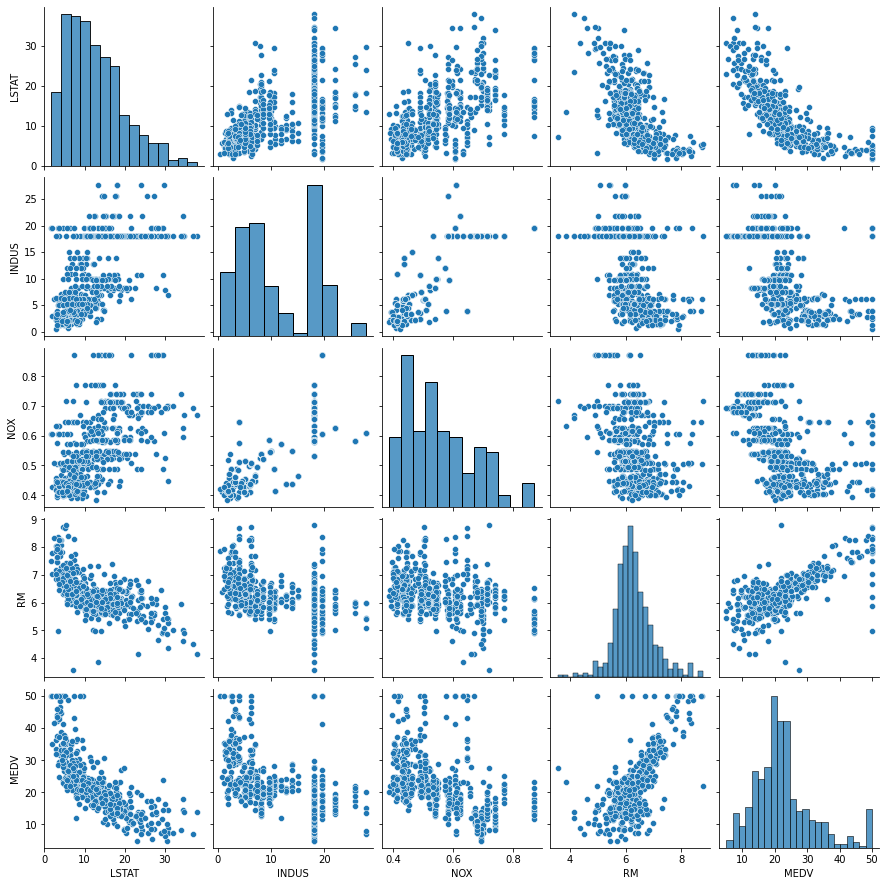

In [6]:
sns.pairplot(df.loc[:,columnas])
plt.show()

#### _Matriz de Correlación_

In [7]:
cormat= np.corrcoef(df[columnas].values.T)
cormat

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

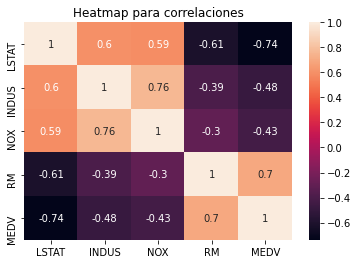

In [8]:
#La misma matriz de correlación puede ser presentada mediante un HeatMap
hm=sns.heatmap(data=cormat,
               annot=True, #muestra los valores de las correlaciones en las celdas
               cbar=True, #barra de color a modo de saturación
               xticklabels=columnas,
               yticklabels=columnas)
plt.title("Heatmap para correlaciones")
plt.show()

In [9]:
#Correlacion lineal entre dos variables
cor_test=stats.pearsonr(df['RM'],df['MEDV'])
print(cor_test)
print("El p-value es:", cor_test[1])

(0.6953599470715393, 2.487228871007442e-74)
El p-value es: 2.487228871007442e-74


## _Modelo de Regresión Lineal Simple:_

In [10]:
df[columnas].head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [11]:
#Establecer nuestra matriz de datos X y variable target y
X=df[['RM']].values
y=df[['MEDV']].values

In [12]:
#Particionamiento de nuestros datos
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=2020)

In [13]:
#Creando una instancia LinearRegression()
modelorls=LinearRegression()

In [14]:
#Hacemos que el modelo aprende de los datos
modelorls.fit(X_train,y_train)

LinearRegression()

In [15]:
#Información del Modelo
# ==========================
print("El intercepto del modelo es:", modelorls.intercept_.round(3))
print("La pendiente del modelo es:", modelorls.coef_[0].round(3))
print("El coeficiente de determinación R2 es:", (modelorls.score(X_train,y_train)*100).round(2),"%")

El intercepto del modelo es: [-34.476]
La pendiente del modelo es: [9.112]
El coeficiente de determinación R2 es: 50.19 %


In [16]:
#Estimación de la variable Dependiente o YPredicho
ytrain_pred= modelorls.predict(X_train)
ytest_pred=modelorls.predict(X_test)

In [17]:
#Otra forma de calcular el R2 mediante sklearn.
print("El coeficiente de determinación R2 es:", (r2_score(y_train,ytrain_pred)*100).round(2),"%")

El coeficiente de determinación R2 es: 50.19 %


#### _Evaluación de Modelos (MSE)_

In [18]:
#Error Cuadrático Medio para Data de Entrenamiento
print("MSE para Dataset Training", mean_squared_error(y_train,ytrain_pred).round(2))

MSE para Dataset Training 41.73


In [19]:
#Error Cuadrático Medio para Data de Testeo
print("MSE para Dataset Testing", mean_squared_error(y_test,ytest_pred).round(2))

MSE para Dataset Testing 51.34


#### _Evaluación de Modelos (RMSE)_

In [20]:
#Para Datos de Entrenamiento
round(m.sqrt(mean_squared_error(y_train,ytrain_pred)),3)

6.46

In [21]:
#Para Datos de Testeo
round(m.sqrt(mean_squared_error(y_test,ytest_pred)),3)

7.165

#### _Evaluación de Modelos (R2)_

In [22]:
#Para Datos de Entrenamiento
round(r2_score(y_train,ytrain_pred),3)

0.502

In [23]:
#Para Datos de Testeo
round(r2_score(y_test,ytest_pred),3)

0.398

In [24]:
#Creando una función para visualizar los datos y la recta de regresión
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return

#### _Graficando mis Datos de Entrenamiento_

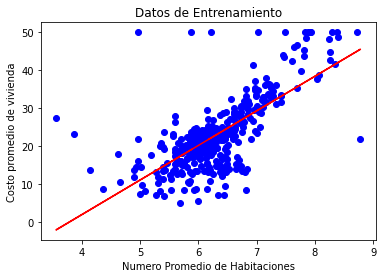

In [25]:
lin_regplot(X_train,y_train, modelorls)
plt.title('Datos de Entrenamiento')
plt.xlabel('Numero Promedio de Habitaciones')
plt.ylabel('Costo promedio de vivienda')
plt.show()

#### _Graficando mis Datos de Testeo_

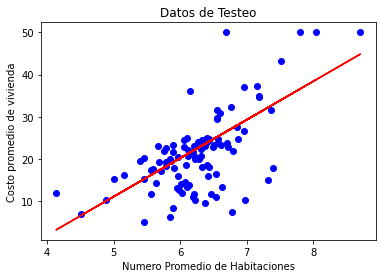

In [26]:
lin_regplot(X_test,y_test, modelorls)
plt.title('Datos de Testeo')
plt.xlabel('Numero Promedio de Habitaciones')
plt.ylabel('Costo promedio de vivienda')
plt.show()

### _Complementando con StatsModels:_

In [27]:
#A la matriz de predictores se le debe adicionar una columna o vector de 1s
X_train=sm.add_constant(X_train,prepend=True)
modelo= sm.OLS(endog=y_train,exog=X_train)
modelo= modelo.fit()

In [28]:
#Visualizando el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     405.1
Date:                Sat, 08 May 2021   Prob (F-statistic):           8.09e-63
Time:                        18:22:23   Log-Likelihood:                -1326.9
No. Observations:                 404   AIC:                             2658.
Df Residuals:                     402   BIC:                             2666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4756      2.865    -12.033      0.0

In [29]:
modelo.conf_int()

array([[-40.10791758, -28.84323821],
       [  8.22164008,  10.00162788]])

## _Modelo de Regresión Lineal Múltiple:_

## _Caso Determinantes del Ausentismo Electoral_

In [30]:
miarchivo="AusentismoPres2011.sav"
df=pd.read_spss(miarchivo)
df.head()

,Ubigeo,Departamento,Dom_Geo,Provincia,Distrito,NumeroDePersonasTotalElectoral,NumeroDePersonasAusentismo,PorcentajeDeAusentismoRespectoAlTotalElectoral,PorcentajeDeAusentismoOrdinal,PorcentajeDeAusentismoDicotomica,PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion,IDH,Alfabetismo,PartidoGanador,PorcentajeDeHogaresEnViviendasCon2oMasNBI,GINI
0,010102,Amazonas,Norte,Chachapoyas,Asunción,234.0,59.0,25.213675,Ausentismo Grave,Ausentismo Fuerte,100.00,0.581463,86.893200,PERU POSIBLE,51.11,0.30
1,010103,Amazonas,Norte,Chachapoyas,Balsas,848.0,208.0,24.528301,Ausentismo Grave,Ausentismo Fuerte,94.87,0.562141,86.527290,FUERZA 2011,20.23,0.31
2,010104,Amazonas,Norte,Chachapoyas,Cheto,478.0,51.0,10.669457,Ausentismo Bajo,Ausentismo Leve,99.40,0.599150,92.838196,GANA PERU,16.87,0.28
3,010105,Amazonas,Norte,Chachapoyas,Chiliquín,638.0,197.0,30.877743,Ausentismo Grave,Ausentismo Fuerte,99.60,0.545484,86.541740,FUERZA 2011,31.73,0.29
4,010106,Amazonas,Norte,Chachapoyas,Chuquibamba,1161.0,333.0,28.682170,Ausentismo Grave,Ausentismo Fuerte,99.62,0.584659,92.598430,FUERZA 2011,17.55,0.31


In [31]:
df.columns

Index(['Ubigeo', 'Departamento', 'Dom_Geo', 'Provincia', 'Distrito',
       'NumeroDePersonasTotalElectoral', 'NumeroDePersonasAusentismo',
       'PorcentajeDeAusentismoRespectoAlTotalElectoral',
       'PorcentajeDeAusentismoOrdinal', 'PorcentajeDeAusentismoDicotomica',
       'PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion', 'IDH',
       'Alfabetismo', 'PartidoGanador',
       'PorcentajeDeHogaresEnViviendasCon2oMasNBI', 'GINI'],
      dtype='object')

In [32]:
ausent=df[["PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion","IDH","Alfabetismo","PorcentajeDeHogaresEnViviendasCon2oMasNBI","PorcentajeDeAusentismoRespectoAlTotalElectoral"]]

In [33]:
#Numero de Registros
len(ausent)

1833

In [34]:
#Conteo de NAs
ausent.isnull().sum()

PorcentajeDeHogaresQueNoCuentanConMediosDeComunicacion    1
IDH                                                       0
Alfabetismo                                               0
PorcentajeDeHogaresEnViviendasCon2oMasNBI                 1
PorcentajeDeAusentismoRespectoAlTotalElectoral            0
dtype: int64

In [35]:
ausent=ausent.dropna(axis=0)
len(ausent)

1832

In [36]:
#Estableciendo nuestra matriz de Datos X y nuestra variable target y
X=ausent.iloc[:,0:4].values
y=ausent.iloc[:,4].values

In [37]:
#Particionamiento de nuestros datos
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=2020)

In [38]:
#Instanciar un objeto de clase LinearRegression()
modelorlm=LinearRegression()
#Hacer que nuestro modelo aprenda de los datos
modelorlm.fit(X_train,y_train)

LinearRegression()

In [39]:
#Estimar los valores de Ypredicho
y_train_pred=modelorlm.predict(X_train)
y_test_pred=modelorlm.predict(X_test)

In [40]:
#Evaluando el coeficiente de determinacion R2
print("Coeficiente de Determinación - Training", r2_score(y_train,y_train_pred).round(2))
print("Coeficiente de Determinación - Testing", r2_score(y_test,y_test_pred).round(2))

Coeficiente de Determinación - Training 0.28
Coeficiente de Determinación - Testing 0.24


In [41]:
#Evaluando el MSE
print("MSE - Training", mean_squared_error(y_train,y_train_pred).round(2))
print("MSE - Testing", mean_squared_error(y_test,y_test_pred).round(2))

MSE - Training 46.07
MSE - Testing 53.15


## _Modelo Robusto con RANSAC:_

In [42]:
#Importando nuestro archivo de trabajo
miarchivo="housing.data.txt"
df=pd.read_csv(miarchivo, sep='\s+',header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
#Establecer nuestra matriz de datos X y variable target y
X=df[['RM']].values
y=df[['MEDV']].values

In [44]:
#Particionamiento de nuestros datos
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=2020)

In [45]:
#Instanciar un objeto de clase RANSACRegressor
ransac=RANSACRegressor(base_estimator=LinearRegression(),
                      min_samples=50, #número mínimo de registros para el arranque de inliers
                      residual_threshold=5,
                      random_state=0)

In [46]:
#Aprendiendo de los datos de entrenamiento
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5)

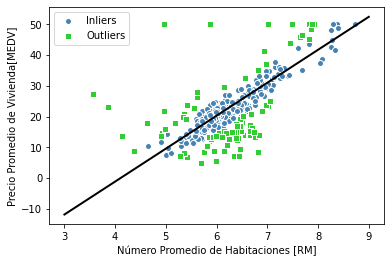

In [47]:
#Visualizando los Inliers y Outliers con su recta de regresión
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X_train[inlier_mask], y_train[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Número Promedio de Habitaciones [RM]')
plt.ylabel('Precio Promedio de Vivienda[MEDV]')
plt.legend(loc='upper left')
plt.show()

In [48]:
#Información del Modelo
print("El Intercepto del Modelo es:", ransac.estimator_.intercept_.round(3))
print("La Pendiente del Modelo es:", ransac.estimator_.coef_[0].round(3))

El Intercepto del Modelo es: [-43.988]
La Pendiente del Modelo es: [10.719]


In [49]:
#Calculando los YPredichos
y_train_pred_ransac=ransac.predict(X_train)

In [50]:
#Calculando el R2 (Coeficiente de Determinación)
r2_score(y_train,y_train_pred_ransac)

0.5209481560627541

## _Tema7. Análisis de Regresión Logística_

**Clasificación:** Modelar una variable cualitativa para determinar la probabilidad de pertenencia a una clase.

### _Caso Práctico: Conjunto de Datos de Reclamos de señal de telefonía_

El objetivo es construir un modelo para predecir si en cierta zona habrá o no habrá reclamo de clientes (indicentes). Para ello cada registro contiene información de:

**RSRP:** Nivel de Señal medido en dBm. Generalmente una buena señal es de -70 dBm, y luego se va degradando hacia valores muy malos por debajo de -115 dBm. Mientras más negativo es el valor peor es la señal. Con respecto a este valor, es importante señalar que los **valores perdidos** fueron codificados como **0**.

**Redireccion:** Si una red 4G hay redirecciones o transiciones hacia 3G es un indicativo de que hay problemas en la señal. Esta variable indica la cantidad de conexiones que se van a 3G.

**CQI:** Indicador de la calidad del enlace de radiofrecuencia. Los valores van de 1 a 15. 6 o 7 son valores malos, a partir de 12 hay una buena calidad. A menor calidad hay propensión de mayor reclamos.

**Incidentes:** Variable objetivo, que indica la cantidad de reclamos que existen en la zona. Podemos recodificar 1: Reclamo, 0: No Reclamo. Hay valores 0, nulos, vacíos que habría que limpiar. Adicionalmente hay pocos indicentes (Reclamos) con relación a la cantidad de registros, por lo que habría que como tarea previa (preprocesamiento) realizar un **balanceo de datos**.

In [51]:
# imbalanced-learn requiere los siguientes paquetes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import statsmodels.api as sm  #Para Análisis de Regresión Logística con librería stats
from imblearn.combine import SMOTETomek
#from imblearn.ensemble import BalancedBaggingClassifier

In [52]:
from sklearn.model_selection import train_test_split #Para particionamiento en Datos de Entrenamiento y Prueba
from sklearn.linear_model import LogisticRegression  #Para Análisis de Regresión Logística 
from sklearn.metrics import classification_report    #Para construir un reporte de clasificación
from sklearn.metrics import confusion_matrix         #Para construir la matriz de confusión
from sklearn.feature_selection import RFE            #Para medir la importancia de las variables incluidas
from sklearn.model_selection import cross_val_score  #Para llevar a cabo CrossValidation
from sklearn import metrics                          #Para distintas métricas de evaluación

In [53]:
from IPython.display import Image
%matplotlib inline

## Importar y preprocesar la data

In [54]:
#Importando nuestro archivo de trabajo
miarchivo="Grid v1.csv"
entel=pd.read_csv(miarchivo)
entel.head(n=5)

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


In [55]:
len(entel)

197640

In [56]:
entel=entel[entel.rsrp<0]

In [57]:
len(entel)

23103

In [58]:
pd.value_counts(entel.incidentes,sort=True)

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64

In [59]:
entel.incidentes=entel.incidentes.replace(to_replace=[2,3,4,5,6,7],value=1)
pd.value_counts(entel.incidentes,sort=True)/len(entel)

0    0.934987
1    0.065013
Name: incidentes, dtype: float64

In [60]:
pd.value_counts(entel["incidentes"],sort=True)/len(entel)

0    0.934987
1    0.065013
Name: incidentes, dtype: float64

**Se necesitará balancear los incidentes como target**

In [61]:
entel=entel[["rsrp","redireccion","cqi","incidentes"]]
entel.head()

,rsrp,redireccion,cqi,incidentes
14400,-115.7500,884.696988,10.856694,0
14949,-112.7500,381.359613,11.205094,0
15498,-118.3750,713.387431,8.729160,0
16046,-115.3750,307.311721,9.607077,0
16596,-118.1875,1728.576707,9.835512,0


In [62]:
x=entel.iloc[:,0:3].values
y=entel.iloc[:,3].values

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,
                                           y,
                                           test_size=0.3,
                                           random_state=2020,
                                           stratify=y)

**Balanceo de Datos**

In [64]:
ST=SMOTETomek(sampling_strategy = 0.8, random_state = 2020)

##### valores balanceados

In [65]:
xtrain_st, ytrain_st = ST.fit_resample(xtrain, ytrain)

In [66]:
xtrain_st

array([[-1.18000000e+02,  2.14292672e+04,  6.69512355e+00],
       [-1.16875000e+02,  2.73962870e+03,  8.33203605e+00],
       [-1.14437500e+02,  2.76117401e+03,  6.94892439e+00],
       ...,
       [-1.15037166e+02,  2.91221489e+04,  9.89396836e+00],
       [-1.15025365e+02,  5.27999956e+03,  7.97231285e+00],
       [-1.13136030e+02,  1.06674508e+03,  8.71460735e+00]])

In [67]:
type(xtrain_st),type(ytrain_st)

(numpy.ndarray, numpy.ndarray)

##### Datos de entrenamiento

In [68]:
#Datos de entrenamiento
xtrain_st= pd.DataFrame(xtrain_st, columns=["rsrp", "redireccion", "cqi"])
ytrain_st= pd.DataFrame(ytrain_st, columns=["incidentes"])

entel_entrenamiento_smotetomek = pd.concat([xtrain_st, ytrain_st], axis=1)
entel_entrenamiento_smotetomek.head()

,rsrp,redireccion,cqi,incidentes
0,-118.0000,21429.267170,6.695124,0
1,-116.8750,2739.628704,8.332036,0
2,-114.4375,2761.174008,6.948924,0
3,-108.8125,8723.662704,8.946568,0
4,-115.0000,104259.655400,9.040943,1


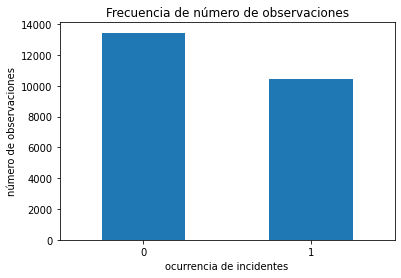

In [69]:
count_classes = pd.value_counts(entel_entrenamiento_smotetomek['incidentes'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")
plt.show()

In [70]:
print(pd.value_counts(entel_entrenamiento_smotetomek['incidentes'], sort = True))

0    13439
1    10414
Name: incidentes, dtype: int64


## _Regresión Logística - Entrenamiento_


In [71]:
#Instanciamos un objeto de clase LogisticRegression()
logit=LogisticRegression()

In [72]:
#Identificando las variales dentro del modelo
entel_vars=entel.columns.to_list()
entel_vars

['rsrp', 'redireccion', 'cqi', 'incidentes']

In [74]:
#Detectando las predictoras y target
#target
Y=['incidentes']
#predictoras
X=[v for v in entel_vars if v not in Y]
print(Y)
print(X)

['incidentes']
['rsrp', 'redireccion', 'cqi']


## _RFE (Recursive Feature Elimination)_

In [75]:
#Numero de variables a quedarse
n=2

In [76]:
#Instanciando un objeto RFE
RFE=RFE(estimator=logit,n_features_to_select=n)

In [77]:
#Aprendiendo de los datos de entrenamiento
selector=RFE.fit(entel_entrenamiento_smotetomek[X],entel_entrenamiento_smotetomek[Y])

In [79]:
#Mostrar las variables más significativas
print(selector.support_)

[ True False  True]


In [80]:
#Mostrar el ranking de las más significativas
print(selector.ranking_)

[1 2 1]


In [81]:
final=zip(entel_vars,selector.support_,selector.ranking_)
list(final)

[('rsrp', True, 1), ('redireccion', False, 2), ('cqi', True, 1)]

## _Estimación REGRESIÓN LOGÍSTICA con statsmodel_

In [83]:
x_entel=entel_entrenamiento_smotetomek[['rsrp','cqi']]
y_entel=entel_entrenamiento_smotetomek['incidentes']

In [85]:
#Aprendiendo
logit= sm.Logit(y_entel,x_entel)
resultado=logit.fit()

Optimization terminated successfully.
         Current function value: 0.684718
         Iterations 4


In [86]:
#Resumiendo
resultado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.001     
Dependent Variable: incidentes       AIC:              32669.1588
Date:               2021-05-08 18:50 BIC:              32685.3181
No. Observations:   23853            Log-Likelihood:   -16333.   
Df Model:           1                LL-Null:          -16341.   
Df Residuals:       23851            LLR p-value:      2.9344e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
rsrp      0.0065      0.0007    9.1215    0.0000    0.0051    0.0079
cqi       0.0604      0.0098    6.1760    0.0000    0.0412    0.0796
=================================================================

"""

## _Estimación REGRESIÓN LOGÍSTICA con Scikit Learn (Trabajando con 3 variables)_

In [87]:
#Crear una instancia de la clase LogisticRegression()
logit_model=LogisticRegression()

In [88]:
#Ajustamos el modelo a los datos de entrenamiento balanceados
logit_model.fit(xtrain_st,ytrain_st)

LogisticRegression()

## _Aspectos Importantes a Considerar_

### _Problema de Ajuste en el Modelo (Sobreajuste o Subajuste)_

In [89]:
#Entrenamiento
logit_model.score(xtrain_st,ytrain_st)

0.6546346371525594

In [90]:
#Testeo
logit_model.score(xtest,ytest)

0.8190737267349589

### _Problema de Variabilidad Interna de los Datos_

In [92]:
scores= cross_val_score(estimator=logit_model,
                        X=xtrain_st,
                        y=ytrain_st,
                        scoring='accuracy',
                        cv=10)
scores

array([0.65716681, 0.65884325, 0.65549036, 0.65786164, 0.65073375,
       0.66037736, 0.64150943, 0.66792453, 0.65073375, 0.64360587])

In [93]:
scores.mean()

0.6544246750348381

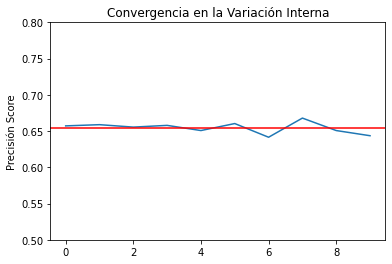

In [98]:
#Visualizando la convergencia mediante un gráfico
plt.plot(range(0,10),scores)
plt.title('Convergencia en la Variación Interna')
plt.ylabel('Precisión Score')
plt.ylim([0.5,0.8])
plt.axhline(y=scores.mean(),color='red')
plt.show()

### _Problema de Punto de Corte_

#### _Data de Entrenamiento_

In [101]:
### _Problema de Punto de Corte_=logit_model.predict(xtrain_st)
prob_train_cat

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
prob_train=logit_model.predict_proba(xtrain_st)
prob_train

array([[0.43123756, 0.56876244],
       [0.65515594, 0.34484406],
       [0.65111411, 0.34888589],
       ...,
       [0.3372045 , 0.6627955 ],
       [0.62330651, 0.37669349],
       [0.66819526, 0.33180474]])

In [103]:
prob=prob_train[:,1]
prob

array([0.56876244, 0.34484406, 0.34888589, ..., 0.6627955 , 0.37669349,
       0.33180474])

In [104]:
prob_df_train=pd.DataFrame(prob,columns=['P(Y=1)'])
prob_df_train.head(10)

,P(Y=1)
0,0.568762
1,0.344844
2,0.348886
3,0.427402
4,0.987827
5,0.335865
6,0.320305
7,0.325462
8,0.317973
9,0.323624


In [105]:
#Probando nuevo punto de corte
cut_point=0.4

In [106]:
prob_df_train['prediccion']=np.where(prob_df_train['P(Y=1)']>cut_point,1,0)
prob_df_train.head()

,P(Y=1),prediccion
0,0.568762,1
1,0.344844,0
2,0.348886,0
3,0.427402,1
4,0.987827,1


In [107]:
#Accuracy del modelo con el punto de corte por default c=0.5
metrics.accuracy_score(y_true=ytrain_st,y_pred=prob_train_cat)

0.6546346371525594

In [108]:
#Accuracy del modelo con nuevo punto de corte c=0.4
metrics.accuracy_score(y_true=ytrain_st,y_pred=prob_df_train.prediccion)

0.6778183037773027

#### _Data de Testeo_

In [109]:
prob_test=logit_model.predict_proba(xtest)
prob_test

array([[0.67071331, 0.32928669],
       [0.67299547, 0.32700453],
       [0.60296994, 0.39703006],
       ...,
       [0.67240766, 0.32759234],
       [0.67253582, 0.32746418],
       [0.68557188, 0.31442812]])

In [110]:
prob2=prob_test[:,1]
prob2

array([0.32928669, 0.32700453, 0.39703006, ..., 0.32759234, 0.32746418,
       0.31442812])

In [111]:
prob_df_test=pd.DataFrame(prob2,columns=['P(Y=1)'])
prob_df_test.head(10)

,P(Y=1)
0,0.329287
1,0.327005
2,0.397030
3,0.354409
4,0.392928
5,0.337886
6,0.331506
7,0.328364
8,0.323843
9,0.407451


In [112]:
#Probando nuevo punto de corte
cut_point=0.4

In [113]:
prob_df_test['prediccion']=np.where(prob_df_test['P(Y=1)']>cut_point,1,0)
prob_df_test.head()

,P(Y=1),prediccion
0,0.329287,0
1,0.327005,0
2,0.397030,0
3,0.354409,0
4,0.392928,0


In [114]:
#Accuracy del modelo con nuevo punto de corte c=0.4
metrics.accuracy_score(y_true=ytest,y_pred=prob_df_test.prediccion)

0.6763814745346992

### _Matriz de Confusión (Data de Entrenamiento)_

In [115]:
xtrain_st, ytrain_st = ST.fit_resample(xtrain, ytrain)

In [122]:
cm_train=pd.crosstab(ytrain_st,prob_df_train.prediccion)
cm_train

prediccion,0,1
row_0,,
0,9665,3774
1,3911,6503


In [123]:
#Identificando los elementos de nuestra Matriz de Confusión
VP_train=cm_train[1][1] #Verdadero Positivo
VN_train=cm_train[0][0] #Verdadero Negativo
FP_train=cm_train[0][1] #Falso Positivo
FN_train=cm_train[1][0] #Falso Negativo

In [124]:
sensibilidad_train= VP_train/(VP_train+FN_train)
sensibilidad_train

0.6327722097888488

In [125]:
especificidad_train= VN_train/(VN_train+FP_train)
especificidad_train

0.7119180907483795

In [126]:
prediccion_train= VP_train/(VP_train+FP_train)
prediccion_train

0.6244478586518148

### _Matriz de Confusión (Data de Testeo)_

In [134]:
cm_test=pd.crosstab(ytest,prob_df_test.prediccion)
cm_test

prediccion,0,1
row_0,,
0,4419,2061
1,182,269


In [135]:
#Identificando los elementos de nuestra Matriz de Confusión
VP_test=cm_test[1][1] #Verdadero Positivo
VN_test=cm_test[0][0] #Verdadero Negativo
FP_test=cm_test[0][1] #Falso Positivo
FN_test=cm_test[1][0] #Falso Negativo

In [136]:
sensibilidad_test= VP_test/(VP_test+FN_test)
sensibilidad_test

0.11545064377682404

In [137]:
especificidad_test= VN_test/(VN_test+FP_test)
especificidad_test

0.9604433818735058

In [138]:
prediccion_test= VP_test/(VP_test+FP_test)
prediccion_test

0.5964523281596452

### _Curva ROC_

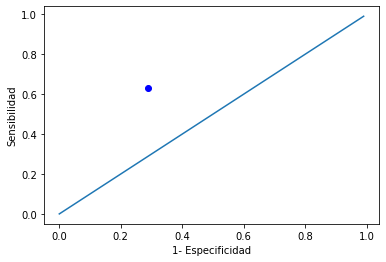

In [141]:
plt.plot(1-especificidad_train,
         sensibilidad_train,
        marker='o',
        color='b')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.show()

In [144]:
metrics.roc_auc_score(y_true=ytest,y_score=prob_df_test.prediccion)

0.6391983863020448